In [155]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import exposure
from typing import List
from skimage import io; io.use_plugin('matplotlib')
plt.rcParams["figure.figsize"] = (20,10)

# Essay Questions

- when we subtract n1 from n2 the remaining will be almost the sum of the noises.
- The mean will be the same because both have the same mean. X and Y are independent Var(X-Y) = Var(X) + Var(y) = 0.01^2 + 0.03^2 
- Averaging Noise will result in decreasing the effect of noise.

# Negative Transform

In [48]:
def negative_transform(img: np.array):
    max_I = img.max()
    new_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #print('img = {}'.format(img[i,j]))
            new_img[i,j] = max_I - img[i,j]
            #print('new_img = {}'.format(new_img[i-1,j-1]))
    
    return new_img.astype(int)

Text(0.5, 1.0, 'Negative Transform Image')

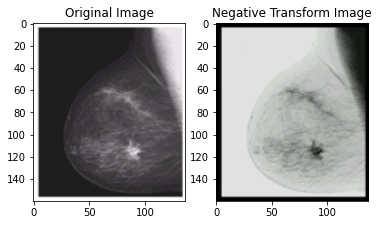

In [51]:
img =cv2.imread('./assets/negative.png')
img = np.array(img)
new_img = negative_transform(img)
plt.subplot(1,2,1), plt.imshow(img)
plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(new_img)
plt.title("Negative Transform Image")

# Rescale [0-1]

In [90]:
def rescale(img:np.array):
    img  = img/255
    min_I = img.min()
    max_I = img.max()
    max_min = max_I-min_I
    new_img = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #print('img = {}'.format(img[i,j]))
            new_img[i,j] = (img[i,j] - min_I)/(max_min)
            #print('new_img = {}'.format(new_img[i-1,j-1]))
    new_img *= 255
    return new_img.astype(int)
    

Text(0.5, 1.0, 'Rescaled Image')

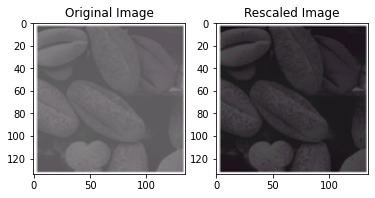

In [91]:
img = cv2.imread('./assets/dark.png')
img = np.array(img)
new_img = rescale(img)
plt.subplot(1,2,1), plt.imshow(img)
plt.title("Original Image")
plt.subplot(1,2,2), plt.imshow(new_img)
plt.title("Rescaled Image")

# Gamma Correction

In [128]:
def gamma_correction(img:np.array, gamma):
    img = img / 255
    new_image = np.power(img,gamma)
    #print(new_image)
    return new_image

In [137]:
def plot_figure(image_list: List[np.ndarray], title_list: List[str], height: int, width: int, cmap: str='gray'):
    assert len(image_list) == len(title_list)
    assert height > 0
    assert width > 0
    for i in range(len(image_list)):
        
        if cmap == 'gray':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap)
        elif cmap == 'rgb':
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i])
        elif cmap == 'bgr':
            plt.subplot(height, width, i + 1), plt.imshow(cv2.cvtColor(image_list[i], cv2.COLOR_BGR2RGB))
        else:
            plt.subplot(height, width, i + 1), plt.imshow(image_list[i], cmap=cmap)
            
        plt.title(title_list[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

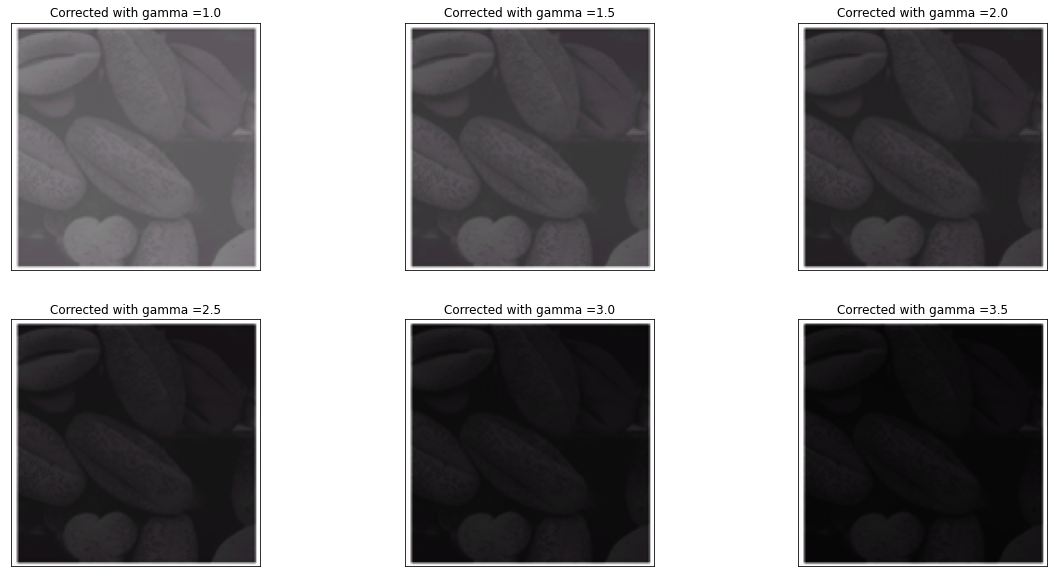

In [150]:
img_list = []
title_list = []
for gamma in np.arange(1,4,0.5):
    img_list.append(gamma_correction(img,gamma))
    title_list.append("Corrected with gamma ={}".format(gamma))
plot_figure(img_list,title_list, 2,3, "gray")

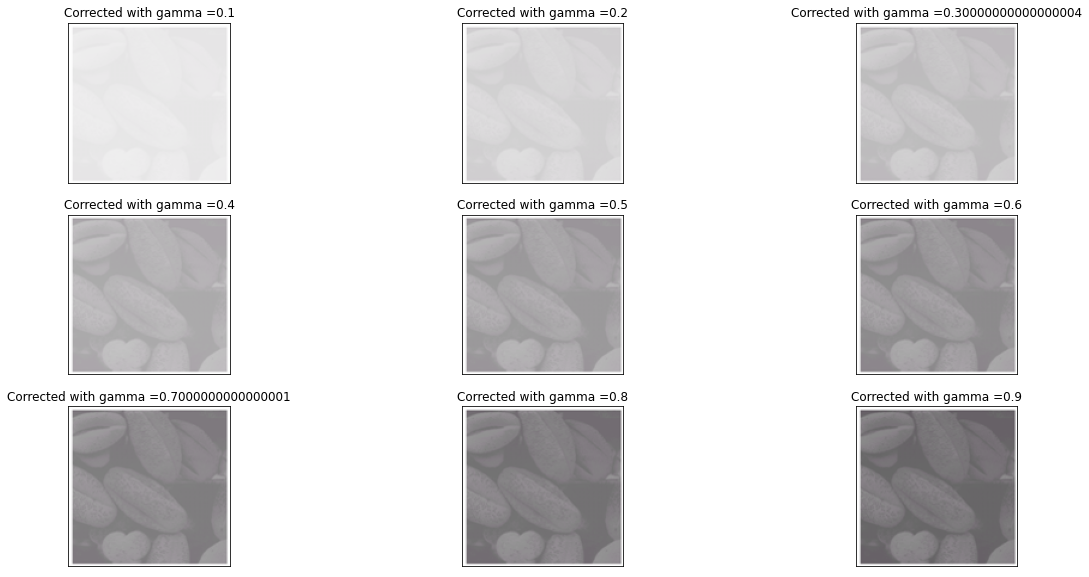

In [151]:
img_list = []
title_list = []
for gamma in np.arange(0.1,1,0.1):
    img_list.append(gamma_correction(img,gamma))
    title_list.append("Corrected with gamma ={}".format(gamma))
plot_figure(img_list,title_list, 3,3, "gray")

# Histogram Equalization

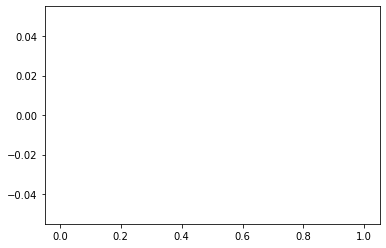

In [164]:
img = skimage.io.imread(fname="./assets/bad_kid.tif")
hist, bins = np.histogram(img.reshape(-1), bins=256)
plt.hist(img.ravel(),256,[0,1])
plt.show()

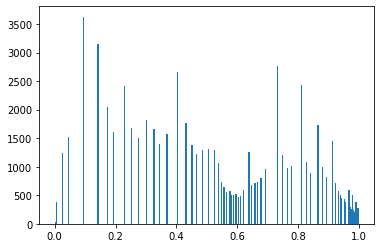

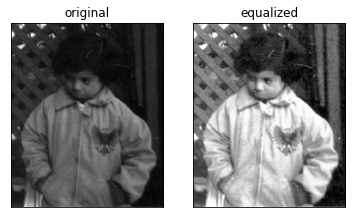

In [165]:
#new_img = cv2.equalizeHist(img)
new_img= exposure.equalize_hist(img)
plt.hist(new_img.ravel(),256,[0,1])
plt.show()
plot_figure([img, new_img], ['original', 'equalized'],1, 2, 'gray')